In [1]:
import pandas as pd

In [5]:
# Map each node to its class
df_classes = pd.read_csv("./bill_challenge_datasets/Training/node_classification.csv")
classes = dict(zip(df_classes.id, df_classes.page_type))

{0: 1,
 1: 2,
 2: 3,
 3: 2,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 2,
 9: 2,
 10: 2,
 11: 4,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 3,
 17: 4,
 18: 2,
 19: 3,
 20: 4,
 21: 3,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 1,
 28: 3,
 29: 3,
 30: 3,
 31: 2,
 32: 2,
 33: 4,
 34: 4,
 35: 3,
 36: 3,
 37: 2,
 38: 2,
 39: 2,
 40: 4,
 41: 2,
 42: 3,
 43: 2,
 44: 1,
 45: 3,
 46: 4,
 47: 2,
 48: 3,
 49: 3,
 50: 2,
 51: 4,
 52: 1,
 53: 3,
 54: 2,
 55: 1,
 56: 2,
 57: 3,
 58: 2,
 59: 4,
 60: 4,
 61: 3,
 62: 4,
 63: 3,
 64: 2,
 65: 3,
 66: 3,
 67: 4,
 68: 1,
 69: 1,
 70: 1,
 71: 4,
 72: 2,
 73: 4,
 74: 2,
 75: 2,
 76: 3,
 77: 4,
 78: 4,
 79: 1,
 80: 2,
 81: 2,
 82: 4,
 83: 2,
 84: 2,
 85: 2,
 86: 3,
 87: 2,
 88: 2,
 89: 4,
 90: 2,
 91: 3,
 92: 3,
 93: 4,
 94: 2,
 95: 4,
 96: 1,
 97: 4,
 98: 2,
 99: 1,
 100: 2,
 101: 1,
 102: 3,
 103: 4,
 104: 2,
 105: 3,
 106: 4,
 107: 3,
 108: 4,
 109: 4,
 110: 2,
 111: 1,
 112: 2,
 113: 4,
 114: 4,
 115: 3,
 116: 4,
 117: 1,
 118: 4,
 119: 1,
 120: 2,
 121: 2,
 122: 2,
 12

In [6]:
df_edges = pd.read_csv("./bill_challenge_datasets/Training/training_graph.csv")
df_edges.head()

,node1,node2
0,17807,18427
1,2257,18427
2,2632,18427
3,3181,18427
4,3897,18427


In [15]:
df_edges["class_same"] = df_edges.apply(lambda row: classes[row["node1"]] == classes[row["node2"]], axis=1)
df_edges.head()

,node1,node2,class_same
0,17807,18427,True
1,2257,18427,True
2,2632,18427,True
3,3181,18427,True
4,3897,18427,True


In [26]:
df_edges.class_same.value_counts() # How many edges are between same-value nodes

True     116799
False     15239
Name: class_same, dtype: int64

In [27]:
max(df_edges.node1.max(), df_edges.node2.max()) # Number of nodes in graph

22469

In [47]:
import numpy as np
import networkx as nx

G = nx.from_pandas_edgelist(df_edges, source="node1", target="node2")
A = nx.adjacency_matrix(G)
A.shape

(20816, 20816)

In [117]:
def predict_edge_from_class(u, v, classes):
    return classes[u] == classes[v] 

In [119]:
from tqdm.notebook import tqdm
import random
import matplotlib.pyplot as plt

def experiment(k):
    G_prime = G.subgraph(random.sample(nx.nodes(G), k=k))
    correct = 0
    predictions = 0
    for i in nx.nodes(G_prime):
        for j in nx.nodes(G_prime):
            if (j < i):
                correct += (i != j) and 0 == G_prime.has_edge(i, j)
                predictions += 1
    # return correct / predictions
    return nx.density(G_prime)


results = {}
for k in tqdm([2, 4, 5, 10, 20, 30, 50, 100, 500, 1000]):
    results[k] = experiment(k)
    
results

  0%|          | 0/10 [00:00<?, ?it/s]

{2: 0,
 4: 0,
 5: 0,
 10: 0,
 20: 0,
 30: 0.0022988505747126436,
 50: 0.0008163265306122449,
 100: 0.00020202020202020202,
 500: 0.0007775551102204409,
 1000: 0.0007507507507507507}

(array([3327.,    0.,    0., 6880.,    0.,    0., 6495.,    0.,    0.,
        5768.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

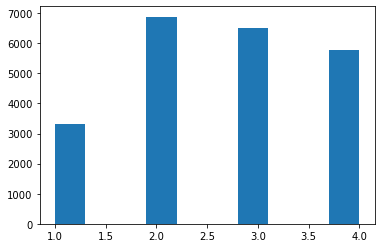

In [81]:
plt.hist(classes.values())

<AxesSubplot:ylabel='Density'>

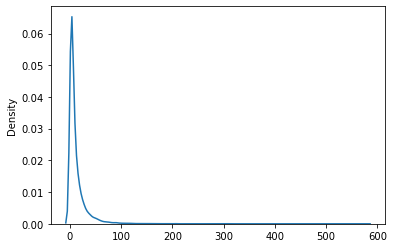

In [114]:
import seaborn as sns

sns.kdeplot(filter(lambda d: 0 < d, dict(nx.degree(G)).values()))